In [40]:
import numpy as np

#my own convex hull
def myConvexHull(bucket):
    solution = np.array([[0.0,0.0]])
    sort = sorted(bucket,key=lambda x:(x[0],x[1]))

    #create p1 dan pn
    solution[0] = sort[0]
    solution = np.vstack((solution, sort[len(sort)-1]))
    hulSim = np.array([[5, 5]])
    hulSim = np.delete(hulSim, 0, axis=0)
    s1 = np.array([[1.0, 2.0]])
    s1 = np.delete(s1, 0, axis=0)
    s2 = np.array([[1.0, 2.0]])
    s2 = np.delete(s2, 0, axis=0)
    
    #membagi menjadi s1 dan s2
    for i  in range (len(bucket)):
        if((bucket[i,0] != solution[0,0] or bucket[i,1] != solution[0,1]) or (bucket[i,0] != solution[1,0] or bucket[i,1] != solution[1,1])):
            if((findDeter(solution[0,0], solution[0,1], solution[1,0], solution[1,1], bucket[i,0], bucket[i,1]) > 0)):  
                if((abs(findDeter(solution[0,0], solution[0,1], solution[1,0], solution[1,1], bucket[i,0], bucket[i,1]))) > 1e-12):
                    s1 = np.vstack((s1, bucket[i]))
            else:
                if((abs(findDeter(solution[0,0], solution[0,1], solution[1,0], solution[1,1], bucket[i,0], bucket[i,1]))) > 1e-12):
                    s2 = np.vstack((s2, bucket[i]))

    hulSim = np.append(hulSim, np.array(findHull(bucket, hulSim, solution, s1, solution[0], solution[1])), axis=0)
    hulSim = np.append(hulSim, np.array(findHull(bucket, hulSim,solution, s2, solution[1], solution[0])), axis=0)

    return hulSim

def findHull(bucket, hulSim,solution, S,A,B):
    if(S.size == 0):
        #base case
        temp = np.array([[0, 0]])
        temp[0][0] = findIndex(bucket, A[0], A[1])
        temp[0][1] = findIndex(bucket, B[0], B[1])
        return temp
    else:
        solution = np.array([[1.0, 2.0]])
        solution = np.delete(solution, 0, axis=0)
        fartest = S[0]
        tempDistance = 0.00
        # Find Orthogonally farthest point from AB
        for i in range (len(S)):
            d = np.linalg.norm(np.cross(B-A, A-S[i]))/np.linalg.norm(B-A)

            if(d > tempDistance):
                tempDistance = d
                fartest = S[i]

        x1 = np.array([[1.0, 2.0]])
        x1 = np.delete(x1, 0, axis=0)
        x2 = np.array([[1.0, 2.0]])
        x2 = np.delete(x2, 0, axis=0) 

        #membuang titik dalam segitiga & membagi x1 dan x2
        for i  in range (len(S)):
            if (pointInTriangle(A[0], A[1], B[0], B[1], fartest[0], fartest[1], S[i,0], S[i,1]) == False) :
                if(findDeter(A[0], A[1], fartest[0], fartest[1], S[i,0], S[i,1]) > 0):
                    x1 = np.vstack((x1, S[i]))
                else:
                    x2 = np.vstack((x2, S[i]))

        #rekursif
        solution = np.append(solution, np.array(findHull(bucket, hulSim,solution, x1, A, fartest)), axis=0)
        solution = np.append(solution, np.array(findHull(bucket, hulSim,solution,x2,fartest,B)), axis=0)

        return solution

def pointInTriangle(x1, y1, x2, y2, x3, y3, x, y):
    #output true untuk titik yang berada dalam segitiga
    denominator = ((y2 - y3)*(x1 - x3) + (x3 - x2)*(y1 - y3))
    a = ((y2 - y3)*(x - x3) + (x3 - x2)*(y - y3)) / denominator
    b = ((y3 - y1)*(x - x3) + (x1 - x3)*(y - y3)) / denominator
    c = 1 - a - b
    return 0 <= a and a <= 1 and 0 <= b and b <= 1 and 0 <= c and c <= 1

def findDeter(a,b,c,d,x,y):
    # output deterimanan dari matriks buatan
    matriks = np.array([[a, b, 1], [c, d, 1], [0,0,1]])    
    matriks[2,0] = x
    matriks[2,1] = y
    d = np.linalg.det(matriks)
    return d

def findIndex(bucket, x, y):
    #mencari indeks dari titik untuk membuat garis
    for i in range (len(bucket)):
        if(bucket[i][0] == x and bucket[i][1] == y):
            return i

In [41]:
#dataset iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()     #ubah dataset sesuai dataset yang diinginkan

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


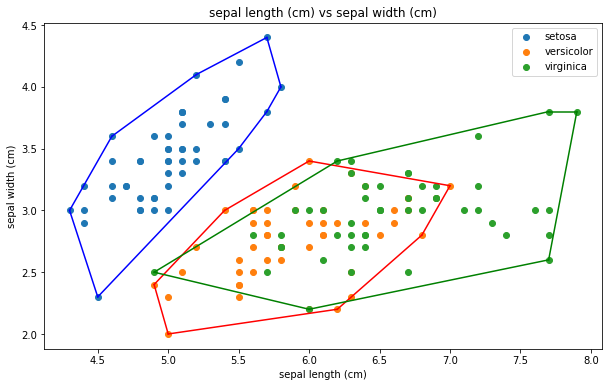

In [42]:
#visualisasi hasil ConvexHull dataset iris: Sepal length vs sepal width
plt.figure(figsize = (10, 6))
atribut1 = 0        #ubah nilai atribut2 dengan atribut yang diinginkan
atribut2 = 1        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

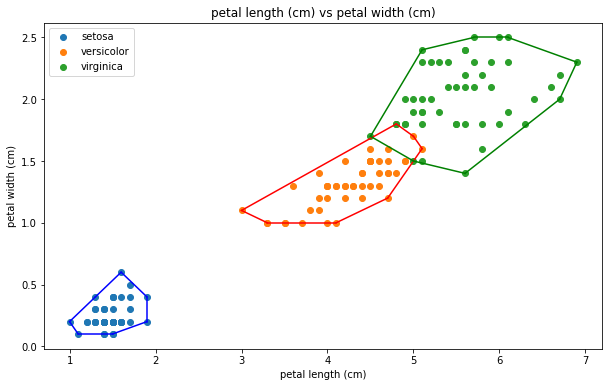

In [43]:
#visualisasi hasil ConvexHull dataset iris: petal length vs petal width
plt.figure(figsize = (10, 6))
atribut1 = 2        #ubah nilai atribut2 dengan atribut yang diinginkan
atribut2 = 3        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [44]:
#dataset wine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


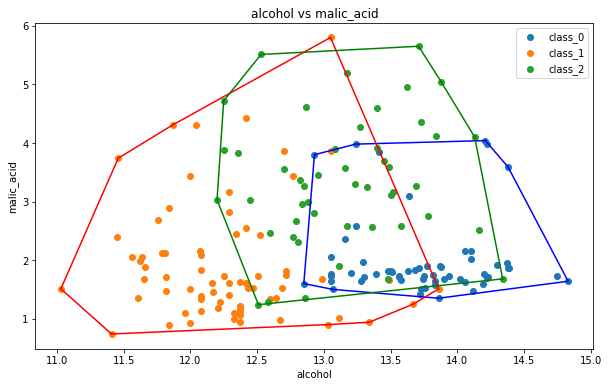

In [45]:
#visualisasi hasil ConvexHull dataset wine: Malic Acid vs Alcohol
plt.figure(figsize = (10, 6))
atribut1 = 0        #ubah nilai atribut2 dengan atribut yang diinginkan
atribut2 = 1        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

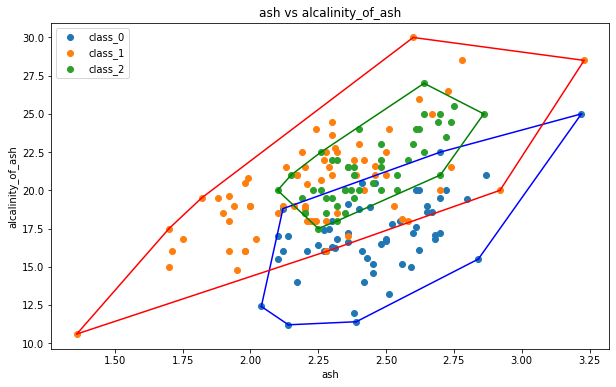

In [46]:
#visualisasi hasil ConvexHull dataset wine: Ash vs Alcalinity of Ash
plt.figure(figsize = (10, 6))
atribut1 = 2        #ubah nilai atribut2 dengan atribut yang diinginkan
atribut2 = 3        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

In [47]:
#dataset breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


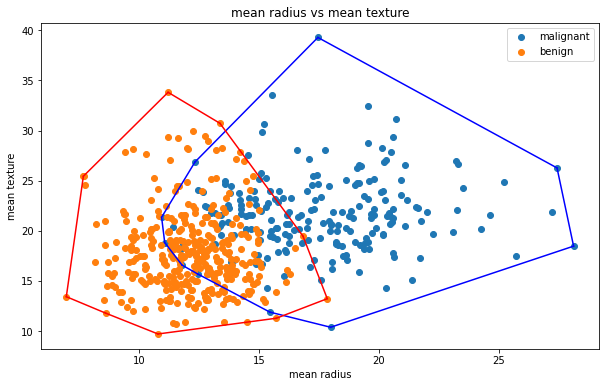

In [48]:
#visualisasi hasil ConvexHull dataset breast cancer: mean radius vs mean texture
plt.figure(figsize = (10, 6))
atribut1 = 0        #ubah nilai atribut1 dengan atribut yang diinginkan
atribut2 = 1        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

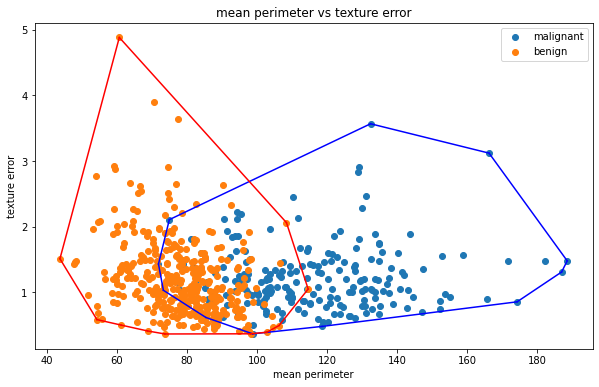

In [49]:
#visualisasi hasil ConvexHull dataset breast cancer: mean area vs mean compactness
plt.figure(figsize = (10, 6))
atribut1 = 2        #ubah nilai atribut1 dengan atribut yang diinginkan
atribut2 = 11        #ubah nilai atribut2 dengan atribut yang diinginkan
colors = ['b','r','g']
plt.title(data.feature_names[atribut1] + ' vs ' + data.feature_names[atribut2])
plt.xlabel(data.feature_names[atribut1])
plt.ylabel(data.feature_names[atribut2])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[atribut1,atribut2]].values
    hull = myConvexHull(bucket)
    hull = hull.astype(int)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()